In [368]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load and inspect the data files
trial_file = "/Users/frimpter/Documents/data_science/ru_datascience_bootcamp/Homework5 Matplotlib/clinicaltrial_data.csv"
mice_file = "/Users/frimpter/Documents/data_science/ru_datascience_bootcamp/Homework5 Matplotlib/mouse_drug_data.csv"

trial_df = pd.DataFrame(pd.read_csv(trial_file))
mice_df = pd.DataFrame(pd.read_csv(mice_file))

#trial_df.head()
#mice_df.head()

# Set indices to Mouse ID and merge files
trial_df = trial_df.set_index("Mouse ID")
mice_df = mice_df.set_index("Mouse ID")

df = pd.merge(trial_df, mice_df, left_index=True, right_index=True)
df = df.reset_index()
df = df.rename(columns={"Timepoint":"Timepoint (days)"}) # Prepare variable name as axis label
#df.head()

In [369]:
# TUMOR VOLUME: Group dataset by Drug and Timepoint to add SE values for each data point

tumor_vol = pd.DataFrame(round(df.groupby(["Drug", "Timepoint (days)"]).mean(), 2))
del tumor_vol["Metastatic Sites"]

# Add standard errors
se = tumor_vol["Tumor Volume (mm3)"].sem()

# Turn drugs into columns for graphing
tumor_vol = tumor_vol.unstack(level="Drug")

tumor_vol.head()

Tumor Volume (mm3)                                       \
Drug                      Capomulin Ceftamin Infubinol Ketapril Naftisol   
Timepoint (days)                                                           
0                             45.00    45.00     45.00    45.00    45.00   
5                             44.27    46.50     47.06    47.39    46.80   
10                            43.08    48.29     49.40    49.58    48.69   
15                            42.06    50.09     51.30    52.40    50.93   
20                            40.72    52.16     53.20    54.92    53.64   

                                                               
Drug             Placebo Propriva Ramicane Stelasyn Zoniferol  
Timepoint (days)                                               
0                  45.00    45.00    45.00    45.00     45.00  
5                  47.13    47.25    43.94    47.53     46.85  
10                 49.42    49.10    42.53    49.46     48.69  
15                 51.36    51.07    41.50    51.53     50.78  
20                 54.36    53.35    40.24    54.07     53.17

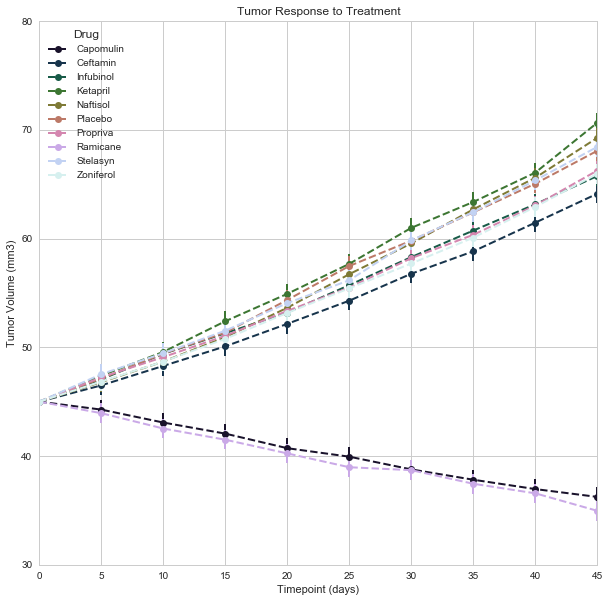

In [370]:
# GRAPH 1 - Tumor Volume by Drug

sns.set_palette(sns.color_palette("cubehelix", 10))

tumor_vol["Tumor Volume (mm3)"].plot(kind="line", ls="--", lw=2, ms=7, yerr=se, marker="o", grid=True, title="Tumor Response to Treatment", figsize=(10,10))

plt.ylabel("Tumor Volume (mm3)")
plt.ylim(30,80)

plt.show()

In [371]:
# METASTATIC SITES: Group dataset by Drug and Timepoint to add SE values for mean number of sites

metsites = pd.DataFrame(round(df.groupby(["Drug", "Timepoint (days)"]).mean(), 2))
del metsites["Tumor Volume (mm3)"]

# Add standard errors
se = metsites["Metastatic Sites"].sem()

# Turn drugs into columns by timepoint for graphing
metsites = metsites.unstack(level="Drug")

metsites.head()

Metastatic Sites                                       \
Drug                    Capomulin Ceftamin Infubinol Ketapril Naftisol   
Timepoint (days)                                                         
0                            0.00     0.00      0.00     0.00     0.00   
5                            0.16     0.38      0.28     0.30     0.26   
10                           0.32     0.60      0.67     0.59     0.52   
15                           0.38     0.79      0.90     0.84     0.86   
20                           0.65     1.11      1.05     1.21     1.15   

                                                               
Drug             Placebo Propriva Ramicane Stelasyn Zoniferol  
Timepoint (days)                                               
0                   0.00     0.00     0.00     0.00      0.00  
5                   0.38     0.32     0.12     0.24      0.17  
10                  0.83     0.57     0.25     0.48      0.50  
15                  1.25     0.76     0.33     0.78      0.81  
20                  1.53     1.00     0.35     0.95      1.29

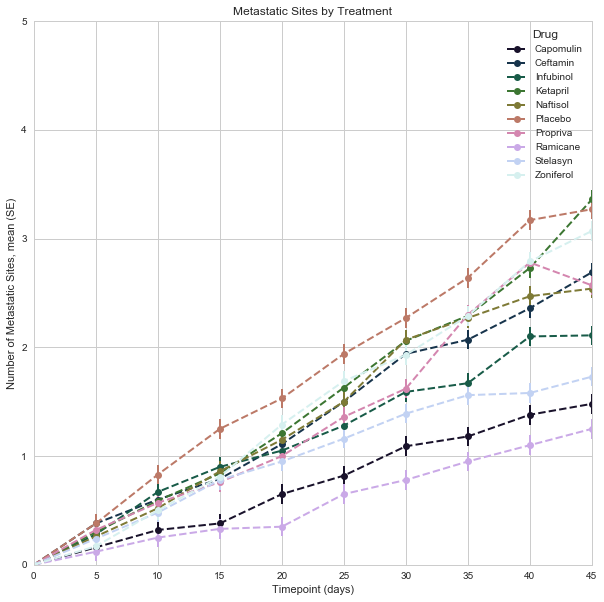

In [372]:
# GRAPH 2 - Mean Number of Metastatic Sites by Drug

metsites["Metastatic Sites"].plot(kind="line", ls="--", lw=2, ms=7, yerr=se, marker="o", grid=True, title="Metastatic Sites by Treatment", figsize=(10,10))

plt.ylabel("Number of Metastatic Sites, mean (SE)")
plt.ylim(0,5)

plt.show()

In [373]:
# SURVIVAL RATES: Mouse survival at end of treatment period

survival = pd.DataFrame(round(df.groupby(["Drug", "Timepoint (days)"]).count(), 2))
del survival["Tumor Volume (mm3)"]
del survival["Metastatic Sites"]

survival = survival.unstack(level="Drug")

#survival

# Convert survival rates to percentages

survival_pct = round(pd.DataFrame(survival.iloc[:,:]/survival.iloc[0,:]*100),1)
survival_pct

Mouse ID                                               \
Drug             Capomulin Ceftamin Infubinol Ketapril Naftisol Placebo   
Timepoint (days)                                                          
0                    100.0    100.0     100.0    100.0    100.0   100.0   
5                    100.0     84.0     100.0     92.0     92.0    96.0   
10                   100.0     80.0      84.0     88.0     84.0    96.0   
15                    96.0     76.0      84.0     76.0     84.0    80.0   
20                    92.0     72.0      80.0     76.0     80.0    76.0   
25                    88.0     72.0      72.0     76.0     72.0    68.0   
30                    88.0     64.0      68.0     72.0     60.0    60.0   
35                    88.0     56.0      48.0     68.0     60.0    56.0   
40                    84.0     56.0      40.0     60.0     60.0    48.0   
45                    84.0     52.0      36.0     44.0     52.0    44.0   

                                                       
Drug             Propriva Ramicane Stelasyn Zoniferol  
Timepoint (days)                                       
0                   100.0    100.0    100.0     100.0  
5                    96.2    100.0     96.2      96.0  
10                   88.5     96.0     88.5      88.0  
15                   65.4     96.0     88.5      84.0  
20                   65.4     92.0     80.8      68.0  
25                   53.8     92.0     73.1      64.0  
30                   50.0     92.0     69.2      60.0  
35                   38.5     84.0     61.5      56.0  
40                   34.6     80.0     46.2      56.0  
45                   26.9     80.0     42.3      56.0

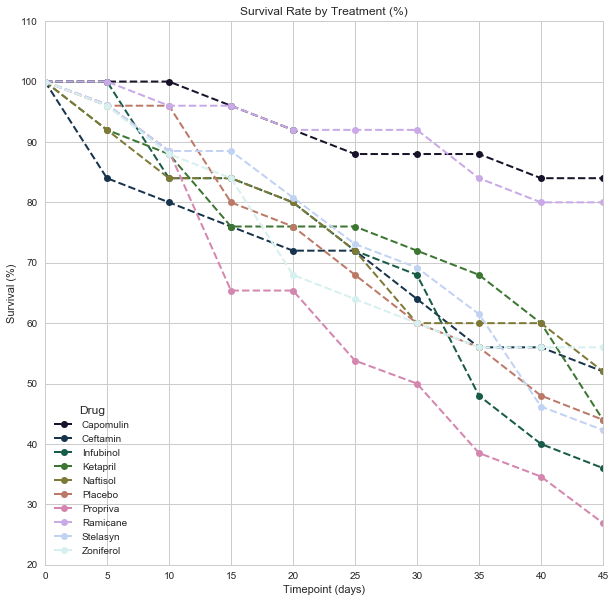

In [374]:
# Graph 3 - Survival of mice by treatment over study period

sns.set_style("whitegrid")
sns.set_palette(sns.color_palette("cubehelix", 10))

survival_pct["Mouse ID"].plot(kind="line", ls="--", lw=2, ms=7, yerr=se, marker="o", grid=True, title="Survival Rate by Treatment (%)", figsize=(10,10))

plt.ylabel("Survival (%)")
plt.ylim(20,110)

plt.show()

In [379]:
# TOTAL CHANGE IN TUMOR SIZE

# Use tumor_vol dataframe to calculate total percentage change in tumor size
tumor_change = pd.DataFrame(round(((tumor_vol.iloc[9,:]) - (tumor_vol.iloc[0,:])) / (tumor_vol.iloc[0,:])*100, 1))
tumor_change = tumor_change.sort_values(0)
tumor_change = tumor_change.unstack(level="Drug")

tumor_change

0                                               \
Drug               Capomulin Ceftamin Infubinol Ketapril Naftisol Placebo   
Tumor Volume (mm3)     -19.5     42.5      46.1     57.0     53.9    51.3   

                                                         
Drug               Propriva Ramicane Stelasyn Zoniferol  
Tumor Volume (mm3)     47.2    -22.3     52.1      46.6

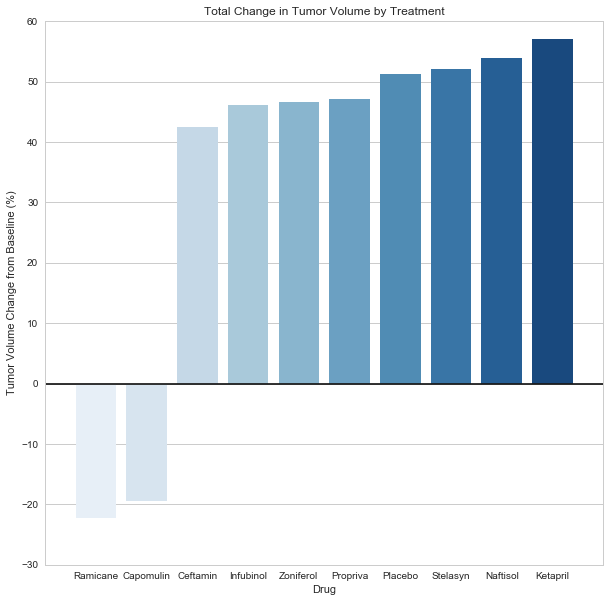

In [383]:
# Graph 4 - Total Change in Tumor Size over Study Period

plt.figure(figsize=(10,10))
sns.barplot(data=tumor_change[0], palette="Blues", order=["Ramicane", "Capomulin", "Ceftamin", "Infubinol", "Zoniferol", "Propriva", "Placebo", "Stelasyn", "Naftisol", "Ketapril"])

plt.title("Total Change in Tumor Volume by Treatment")

plt.xlabel("Drug")
plt.xlim(-1,10)
plt.ylabel("Tumor Volume Change from Baseline (%)")
plt.ylim(-30,60,10)

plt.hlines(0,-1,10)

plt.show()

In [384]:
print("Three Trends from Pymaceuticals Analysis: ")
print("\n1. Only two drugs, Ramicane and Capomulin, reduced overall tumor size over the course of treatment.")
print("\n2. Ramicane and Capomulin also had the fewest metastatic sites at every timepoint in the study.")
print("\n3. Ramicane and Capomulin had the most favorable survival rates over all timepoints.")

Three Trends from Pymaceuticals Analysis: 

1. Only two drugs, Ramicane and Capomulin, reduced overall tumor size over the course of treatment.

2. Ramicane and Capomulin also had the fewest metastatic sites at every timepoint in the study.

3. Ramicane and Capomulin had the most favorable survival rates over all timepoints.
